# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
df = pd.read_csv("/content/commerce sample dataset by vokraf - Sheet1.csv")
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,transaction table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,id,timestamp purchase,user_id,SKU,kategori,jumlah,harga,total harga
2,NaN,479hf,2023-05-14 19:01:59,83683,lilin,aksesoris rumah,1,"Rp4,000","Rp4,000"
3,NaN,389w,2023-01-28 09:54:35,12622,pisau,alat dapur,1,"Rp432,000","Rp432,000"
4,NaN,633bq,2023-02-07 01:44:32,12622,raket tenis,olahraga,1,4000000,4000000
...,...,...,...,...,...,...,...,...,...
474,NaN,455y,2023-03-15 03:32:00,52594,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"
475,NaN,351k,2023-03-09 06:13:23,55002,rumput,tanaman hias,1,"Rp102,000","Rp102,000"
476,NaN,316tr,2023-04-29 01:18:27,65509,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"
477,NaN,217nl,2023-04-12 18:39:21,70341,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"


In [ ]:
df = df.drop(columns='Unnamed: 0')

In [ ]:
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,transaction table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id,timestamp purchase,user_id,SKU,kategori,jumlah,harga,total harga
2,479hf,2023-05-14 19:01:59,83683,lilin,aksesoris rumah,1,"Rp4,000","Rp4,000"
3,389w,2023-01-28 09:54:35,12622,pisau,alat dapur,1,"Rp432,000","Rp432,000"
4,633bq,2023-02-07 01:44:32,12622,raket tenis,olahraga,1,4000000,4000000
...,...,...,...,...,...,...,...,...
474,455y,2023-03-15 03:32:00,52594,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"
475,351k,2023-03-09 06:13:23,55002,rumput,tanaman hias,1,"Rp102,000","Rp102,000"
476,316tr,2023-04-29 01:18:27,65509,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"
477,217nl,2023-04-12 18:39:21,70341,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"


In [ ]:
drop = [0]
df = df.drop(index=drop)
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,id,timestamp purchase,user_id,SKU,kategori,jumlah,harga,total harga
2,479hf,2023-05-14 19:01:59,83683,lilin,aksesoris rumah,1,"Rp4,000","Rp4,000"
3,389w,2023-01-28 09:54:35,12622,pisau,alat dapur,1,"Rp432,000","Rp432,000"
4,633bq,2023-02-07 01:44:32,12622,raket tenis,olahraga,1,4000000,4000000
5,134g,2023-01-26 06:21:45,16054,wajan anti lengket,alat dapur,1,"Rp500,000","Rp500,000"
...,...,...,...,...,...,...,...,...
474,455y,2023-03-15 03:32:00,52594,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"
475,351k,2023-03-09 06:13:23,55002,rumput,tanaman hias,1,"Rp102,000","Rp102,000"
476,316tr,2023-04-29 01:18:27,65509,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"
477,217nl,2023-04-12 18:39:21,70341,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"


In [ ]:
new_column_names = {
    'Unnamed: 1': 'id',
    'Unnamed: 2': 'timestamp purchase',
    'Unnamed: 3': 'user_id',
    'Unnamed: 4': 'SKU',
    'Unnamed: 5': 'kategori',
    'Unnamed: 6': 'jumlah',
    'Unnamed: 7': 'harga',
    'Unnamed: 8': 'total harga',
}
df.rename(columns=new_column_names, inplace=True)
df

,id,timestamp purchase,user_id,SKU,kategori,jumlah,harga,total harga
1,id,timestamp purchase,user_id,SKU,kategori,jumlah,harga,total harga
2,479hf,2023-05-14 19:01:59,83683,lilin,aksesoris rumah,1,"Rp4,000","Rp4,000"
3,389w,2023-01-28 09:54:35,12622,pisau,alat dapur,1,"Rp432,000","Rp432,000"
4,633bq,2023-02-07 01:44:32,12622,raket tenis,olahraga,1,4000000,4000000
5,134g,2023-01-26 06:21:45,16054,wajan anti lengket,alat dapur,1,"Rp500,000","Rp500,000"
...,...,...,...,...,...,...,...,...
474,455y,2023-03-15 03:32:00,52594,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"
475,351k,2023-03-09 06:13:23,55002,rumput,tanaman hias,1,"Rp102,000","Rp102,000"
476,316tr,2023-04-29 01:18:27,65509,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"
477,217nl,2023-04-12 18:39:21,70341,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"


In [ ]:
drop = [1]
df = df.drop(index=drop)
df

,id,timestamp purchase,user_id,SKU,kategori,jumlah,harga,total harga
2,479hf,2023-05-14 19:01:59,83683,lilin,aksesoris rumah,1,"Rp4,000","Rp4,000"
3,389w,2023-01-28 09:54:35,12622,pisau,alat dapur,1,"Rp432,000","Rp432,000"
4,633bq,2023-02-07 01:44:32,12622,raket tenis,olahraga,1,4000000,4000000
5,134g,2023-01-26 06:21:45,16054,wajan anti lengket,alat dapur,1,"Rp500,000","Rp500,000"
6,122j,2023-01-27 00:20:22,17762,pisau,alat dapur,1,"Rp432,000","Rp432,000"
...,...,...,...,...,...,...,...,...
474,455y,2023-03-15 03:32:00,52594,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"
475,351k,2023-03-09 06:13:23,55002,rumput,tanaman hias,1,"Rp102,000","Rp102,000"
476,316tr,2023-04-29 01:18:27,65509,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"
477,217nl,2023-04-12 18:39:21,70341,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000"


In [ ]:
df.nunique()

id                    470
timestamp purchase    477
user_id               372
SKU                   103
kategori               27
jumlah                 11
harga                  72
total harga            98
dtype: int64

In [ ]:
df['timestamp purchase'].max()

'2023-05-30 17:46:01'

In [ ]:
 df['timestamp purchase'].min()

'2023-01-01 07:38:30'

Data from 1 January - 30 May

In [ ]:
from datetime import datetime, timedelta

In [ ]:
def increment_timestamp(row):
    timestamp = row['timestamp purchase']
    new_timestamp = timestamp.replace('60:', '00:').replace(':60', ':00')
    return new_timestamp

df['new_timestamp'] = df.apply(increment_timestamp, axis=1)

In [ ]:
df

,id,timestamp purchase,user_id,SKU,kategori,jumlah,harga,total harga,new_timestamp
2,479hf,2023-05-14 19:01:59,83683,lilin,aksesoris rumah,1,"Rp4,000","Rp4,000",2023-05-14 19:01:59
3,389w,2023-01-28 09:54:35,12622,pisau,alat dapur,1,"Rp432,000","Rp432,000",2023-01-28 09:54:35
4,633bq,2023-02-07 01:44:32,12622,raket tenis,olahraga,1,4000000,4000000,2023-02-07 01:44:32
5,134g,2023-01-26 06:21:45,16054,wajan anti lengket,alat dapur,1,"Rp500,000","Rp500,000",2023-01-26 06:21:45
6,122j,2023-01-27 00:20:22,17762,pisau,alat dapur,1,"Rp432,000","Rp432,000",2023-01-27 00:20:22
...,...,...,...,...,...,...,...,...,...
474,455y,2023-03-15 03:32:00,52594,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000",2023-03-15 03:32:00
475,351k,2023-03-09 06:13:23,55002,rumput,tanaman hias,1,"Rp102,000","Rp102,000",2023-03-09 06:13:23
476,316tr,2023-04-29 01:18:27,65509,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000",2023-04-29 01:18:27
477,217nl,2023-04-12 18:39:21,70341,tanaman rambat,tanaman hias,1,"Rp102,000","Rp102,000",2023-04-12 18:39:21


In [ ]:
df = df.drop(columns='timestamp purchase')

In [ ]:
df[df['new_timestamp'].str.contains('60', case=False)]

,id,user_id,SKU,kategori,jumlah,harga,total harga,new_timestamp


In [ ]:
df[df['new_timestamp'].str.contains('2023-02-30', case=False)]

,id,user_id,SKU,kategori,jumlah,harga,total harga,new_timestamp
18,459q,37356,talenan,alat dapur,1,"Rp60,000","Rp60,000",2023-02-30 12:08:53
134,899yl,14864,telur omega 3,makanan,1,100000,100000,2023-02-30 16:25:48
257,735pw,17697,bor tangan portable,elektronik,1,"Rp2,500,000","Rp2,500,000",2023-02-30 12:05:41


In [ ]:
df[df['new_timestamp'].str.contains('2023-02-29', case=False)]

,id,user_id,SKU,kategori,jumlah,harga,total harga,new_timestamp
16,155j,34674,wajan anti lengket,alat dapur,1,"Rp500,000","Rp500,000",2023-02-29 05:42:45
32,294uj,39268,bor tangan portable,perkakas,1,"Rp2,500,000","Rp2,500,000",2023-02-29 18:42:27
129,457fs,32392,batu akik,dekorasi rumah,1,"Rp5,000","Rp5,000",2023-02-29 07:11:03
366,476yl,14920,telur omega 3,makanan,1,100000,100000,2023-02-29 07:15:29
430,198rt,38484,karpet mie mobil,otomotif,1,"Rp1,000,000","Rp1,000,000",2023-02-29 03:06:46


In [ ]:
df['new_timestamp'] = df['new_timestamp'].str.replace('2023-02-29', '2023-03-01', case=False)

In [ ]:
df['new_timestamp'] = df['new_timestamp'].str.replace('2023-02-30', '2023-03-02', case=False)

In [ ]:
df[df['new_timestamp'].str.contains('24:', case=False)]

,id,user_id,SKU,kategori,jumlah,harga,total harga,new_timestamp
34,312sd,69769,panci,alat dapur,1,"Rp250,000","Rp250,000",2023-04-09 03:24:12
36,500k,70495,panci,alat dapur,1,"Rp250,000","Rp250,000",2023-04-07 24:28:56
54,426sa,14778,semen,bahan bangunan,1,"Rp60,000","Rp60,000",2023-01-15 24:34:08
63,425g,42242,semen,bahan bangunan,1,"Rp60,000","Rp60,000",2023-02-12 24:53:24
66,248t,54069,pintu alumunium,bahan bangunan,1,"Rp1,700,000","Rp1,700,000",2023-03-30 21:24:49
117,833yl,14778,mangga,makanan,1,80000,80000,2023-05-11 24:08:13
124,310w,29157,karpet turki,dekorasi rumah,4,"Rp20,000,000","Rp80,000,000",2023-02-26 24:30:14
158,205h,74196,karpet turki,dekorasi rumah,1,"Rp20,000,000","Rp20,000,000",2023-04-25 24:29:20
176,414bn,26589,tv LCD,elektronik,1,"Rp12,000,000","Rp12,000,000",2023-01-18 24:26:50
208,991yl,29157,mangga,makanan,1,80000,80000,2023-03-28 24:35:15


In [ ]:
df['new_timestamp'] = df['new_timestamp'].str.replace('24:', '23:', case=False)

In [ ]:
df['new_timestamp'] = pd.to_datetime(df['new_timestamp'])

# EDA and Visualization

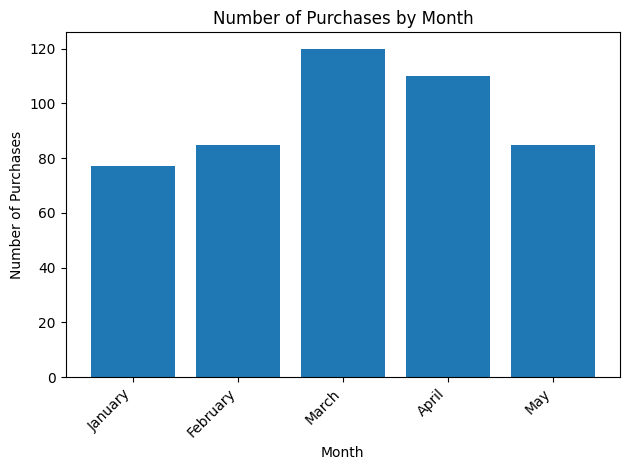

In [ ]:
df['purchase_month'] = df['new_timestamp'].dt.month
month_counts = df['purchase_month'].value_counts().sort_index()

month_names = [pd.Timestamp(year=2023, month=month, day=1).strftime('%B') for month in month_counts.index]


plt.bar(month_names, month_counts)
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()








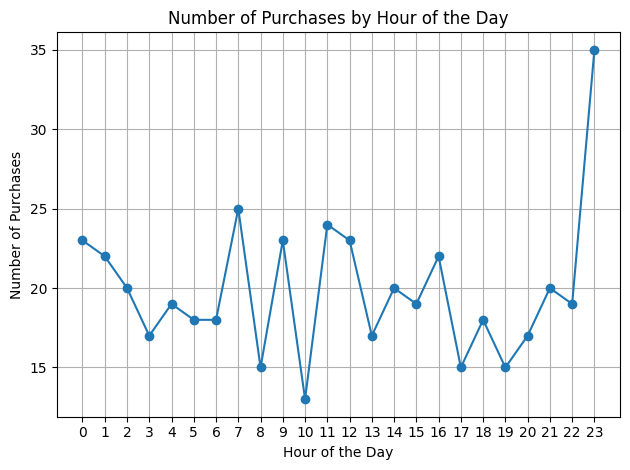

In [ ]:
df['purchase_hour'] = df['new_timestamp'].dt.hour


hour_counts = df['purchase_hour'].value_counts().sort_index()

plt.plot(hour_counts.index, hour_counts.values, marker='o', linestyle='-')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Hour of the Day')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
df['SKU'].value_counts().head(3)

batu hiasan      27
raket tenis      25
telur omega 3    22
Name: SKU, dtype: int64

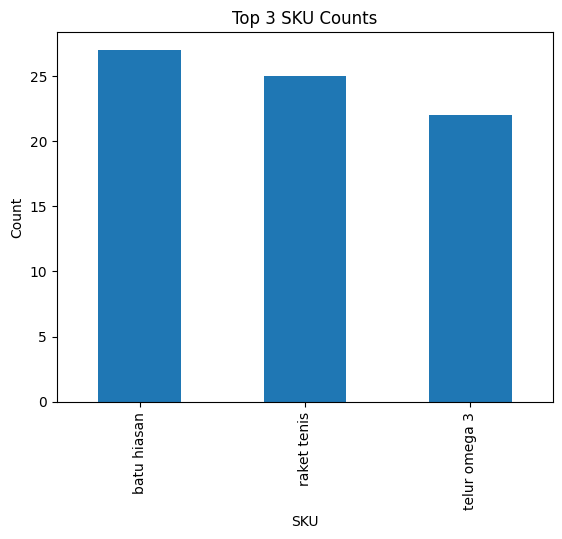

In [ ]:
top_sku_counts = df['SKU'].value_counts().head(3)

top_sku_counts.plot(kind='bar')

plt.xlabel('SKU')
plt.ylabel('Count')
plt.title('Top 3 SKU Counts')


plt.show()

In [ ]:
df['kategori'].value_counts()

makanan                   86
olahraga                  73
gadget & aksesoris        56
dekorasi rumah            51
alat dapur                44
mainan anak               20
elektronik                19
otomotif                  17
bumbu dapur               16
binatang peliharaan       12
tanaman hias              12
bahan bangunan            11
perkakas                   9
peternakan & perikanan     9
sembako                    7
furniture                  5
kecantikan                 5
kebutuhan anak             4
kesehatan                  4
minuman                    4
hobi                       3
bahan makanan              2
dapur                      2
home appliances            2
personal care              2
hiasan rumah               1
aksesoris rumah            1
Name: kategori, dtype: int64

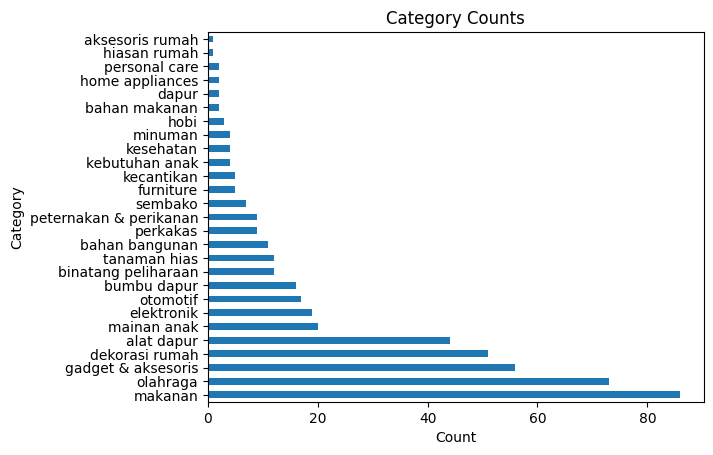

In [ ]:
kategori_counts = df['kategori'].value_counts()


kategori_counts.plot(kind='barh')


plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Category Counts')


plt.show()

In [ ]:
df['harga'] = df['harga'].str.replace('Rp', '', case=False)
df['harga'] = df['harga'].str.replace(',', '', case=False)

In [ ]:
df['total harga'] = df['total harga'].str.replace('Rp', '', case=False)
df['total harga'] = df['total harga'].str.replace(',', '', case=False)

In [ ]:
df

,id,user_id,SKU,kategori,jumlah,harga,total harga,new_timestamp,purchase_month,purchase_hour
2,479hf,83683,lilin,aksesoris rumah,1,4000,4000,2023-05-14 19:01:59,5,19
3,389w,12622,pisau,alat dapur,1,432000,432000,2023-01-28 09:54:35,1,9
4,633bq,12622,raket tenis,olahraga,1,4000000,4000000,2023-02-07 01:44:32,2,1
5,134g,16054,wajan anti lengket,alat dapur,1,500000,500000,2023-01-26 06:21:45,1,6
6,122j,17762,pisau,alat dapur,1,432000,432000,2023-01-27 00:20:22,1,0
...,...,...,...,...,...,...,...,...,...,...
474,455y,52594,tanaman rambat,tanaman hias,1,102000,102000,2023-03-15 03:32:00,3,3
475,351k,55002,rumput,tanaman hias,1,102000,102000,2023-03-09 06:13:23,3,6
476,316tr,65509,tanaman rambat,tanaman hias,1,102000,102000,2023-04-29 01:18:27,4,1
477,217nl,70341,tanaman rambat,tanaman hias,1,102000,102000,2023-04-12 18:39:21,4,18


In [ ]:
df['user_id'].nunique()

372

In [ ]:
df['total harga'] = pd.to_numeric(df['total harga'])

In [ ]:
df['total harga'].sum()

2156470000

In [ ]:
 df['total harga'].sum() / df['user_id'].nunique()

5796962.3655913975

In [ ]:
a = df.groupby('user_id')['total harga'].median()

In [ ]:
a.median()

500000.0